In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [115]:
def make_system1(beta, gamma, alpha):
    
    init = State(S=95, I=1, R=0, Q=0)   
    #S is Susceptible, I is Infected, R is Recovered, Q is Quarantined 
    init /= sum(init)
    
    t0 = 0 #start of semeseter
    t_end = 7 * 14 #end of semester
    
    return System(init=init, t0=t0, t_end=t_end, beta=beta, 
                  gamma=gamma, alpha=alpha)

In [3]:
def update1(state, system): 
    s, i, r, q = state 

    quarantined = i * system.alpha
    infected = system.beta * i * s - q
    recoveredi = system.gamma * i  
    recoveredq = system.gamma * q
    
    s -= infected 
    q += (quarantined - recoveredq)
    i += (infected - recoveredi)
    r += (recoveredq + recoveredi)
    
    return State(S=s, I=i, R=r, Q=q)

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a DataFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end):
        frame.loc[t+1] = update_func(frame.loc[t], system)
    
    system.results = frame

In [5]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

alpha = 1/100    # quarantine 

sir = make_system(beta, gamma, alpha)
run_simulation(sir, update1)
sir.results.head()

,S,I,R,Q
0,0.989583,0.010417,0.000000,0.000000
1,0.986147,0.011249,0.002604,0.000104
2,0.982554,0.012030,0.005442,0.000191
3,0.978804,0.012772,0.008497,0.000263
4,0.974901,0.013483,0.011756,0.000325


In [6]:
def plot_results(S, I, R, Q): 
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    plot(Q, '*', color='black', label='Quarantined')
    
    decorate(xlabel='Time (days)', 
             ylabel='Fraction of population')

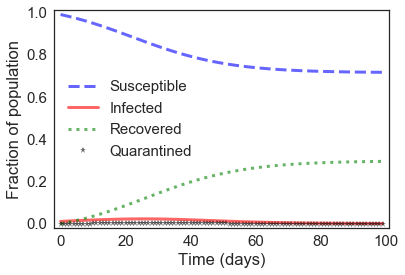

In [7]:
frame = sir.results
plot_results(frame.S, frame.I, frame.R, frame.Q)

In [8]:
def calc_total_infected(system):
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]

In [9]:
def sweep_alpha(q_array):
    sweep = SweepSeries()
    for alpha in q_array: 
        sir = make_system(beta, gamma, alpha)
        run_simulation(sir, update1)
        sweep[alpha] = calc_total_infected(sir)
    return sweep

In [10]:
q_array = linspace(0, .1, 21)
alpha_sweep = sweep_alpha(q_array)

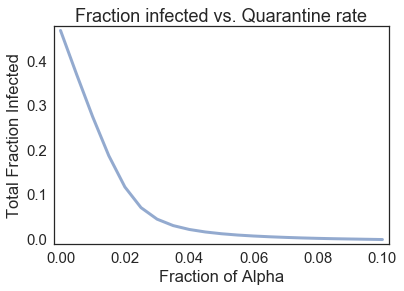

In [11]:
plot(alpha_sweep)

decorate(xlabel='Fraction of Alpha',
         ylabel='Total Fraction Infected',
         title='Fraction infected vs. Quarantine rate',
         legend=False)

## HELLO LIBBY AND MAYA EVERYTHING IS DIFFERENT AFTER THIS POINT

IndentationError: unexpected indent (<ipython-input-117-7e08d1dc9ab7>, line 3)

In [118]:
orientation = make_orientation(beta, gamma, 0, 7)

In [119]:
#print(orientation)

In [246]:
def make_system(beta, gamma, alpha, start_semester):
    
    init = State(S=95, I=1, R=0, Q=0)   
    #S is Susceptible, I is Infected, R is Recovered, Q is Quarantined 
   # init /= sum(init)
    
    t0 = 0                              #beginning of time
    start_semester = start_semester     #orientation over, semester starts
    t_end = 98                          #end of time
    
    return System(init=init, t0=t0, t_end=t_end, start_semester=start_semester, beta=beta, 
                  gamma=gamma, alpha=alpha)

In [ ]:
def update_orientation(state, system): 

    denominator = sum(state)
    state /= denominator
    
    s, i, r, q = state 

    quarantined = q
    infected = system.beta * i * s - q
    recoveredi = system.gamma * i  
    recoveredq = system.gamma * q
    
    s -= infected 
    q += (quarantined - recoveredq)
    i += (infected - recoveredi)
    r += (recoveredq + recoveredi)
    
    state *= denominator 
    
    return State(S=s, I=i, R=r, Q=q)

In [121]:
#print (frame)

In [123]:
# tc = 3      # time between contacts in days 
# tr = 4      # recovery time in days

# beta = 1 / tc      # contact rate in per day
# gamma = 1 / tr     # recovery rate in per day

# alpha = 1/100    # quarantine 

# sir = make_system(beta, gamma, alpha)

In [236]:
init = State(S=95, I=1, R=0, Q=0)

In [237]:
def update_orientation(state, system): 

    denominator = state.S + state.I + state.R + state.Q
    state /= denominator
    
    s, i, r, q = state 

    quarantined = q
    infected = system.beta * i * s - q
    recoveredi = system.gamma * i  
    recoveredq = system.gamma * q
    
    s -= infected 
    q += (quarantined - recoveredq)
    i += (infected - recoveredi)
    r += (recoveredq + recoveredi)
    
    S=s*denominator
    R=r*denominator
    I=i*denominator
    Q=q*denominator
    
#     print (S)
#     print(R)
#     print(I)
#     print(Q)
    
    
    state = S,I,R,Q
    
    return State(S=s, I=i, R=r, Q=q)

In [238]:
def update_semester(state, system): 
    
    #print(state)
    
    denominator = state.S + state.I + state.R + state.Q
    state /= denominator
    
    #print(denominator)
    
    s, i, r, q = state 

    quarantined = i * system.alpha
    infected = system.beta * i * s - q
    recoveredi = system.gamma * i  
    recoveredq = system.gamma * q
    
    s -= infected 
    q += (quarantined - recoveredq)
    i += (infected - recoveredi)
    r += (recoveredq + recoveredi)
    
    S=s*denominator
    R=r*denominator
    I=i*denominator
    Q=q*denominator
    
#     print(S)
#     print(R)
#     print(I)
#     print(Q)
    
    state = S,I,R,Q
    
    #print(state)
    
    #state *= denominator 
    #print (state)
    #return state

In [239]:
test = update_semester(init, sir)
print (test)

None


In [240]:
def run_simulation(system, update_orientaiton, update_semester, upperclassmen):
    """Runs a simulation of the system.
    
    Add a DataFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    frame = DataFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    
    for t in linrange(system.t0, system.start_semester):
        frame.loc[t+1] = update_orientation(frame.loc[t], system)
        
    frame.S[system.start_semester] += upperclassmen
                
    for t in linrange(system.start_semester+1, system.t_end):
        frame.loc[t+1] = update_semester(frame.loc[t], system)
    
    system.results = frame
    

In [256]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

alpha = 1/100   # quarantine 

start_semester = 7

upperclassmen = 270

sir = make_system(beta, gamma, alpha, start_semester)
run_simulation(sir, update_orientation, update_semester, upperclassmen)

frame = sir.results
#print(frame)
sir.results
#plot_results(frame.S, frame.I, frame.R, frame.Q)

,S,I,R,Q
0,95,1,0,0
1,0.986147,0.0112486,0.00260417,0
2,0.98245,0.012134,0.0054163,0
3,0.978476,0.0130742,0.0084498,0
4,0.974212,0.0140699,0.0117183,0
5,0.969643,0.0151214,0.0152358,0
6,0.964755,0.0162285,0.0190162,0
7,270.96,0.0173903,0.0230733,0
8,0.953974,0.0186049,0.0274209,0
9,NaN,NaN,NaN,NaN


In [66]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

alpha = 1/100   # quarantine 

start_semester = 7

sir = make_system(beta, gamma, alpha, start_semester)
run_simulation(sir, update_orientation, update_semester)
sir.results.head()


TypeError: run_simulation() missing 1 required positional argument: 'upperclassmen'

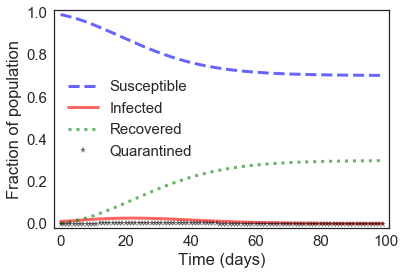

In [50]:
frame = sir.results
plot_results(frame.S, frame.I, frame.R, frame.Q)

In [51]:
def sweep_start_semester(semester_array):
    sweep = SweepSeries()
    for start_semester in semester_array: 
        sir = make_system(beta, gamma, alpha,start_semester)
        run_simulation(sir, update_orientation, update_semester)
        sweep[start_semester] = calc_total_infected(sir)
    return sweep

In [54]:
semester_array = linspace(0, 98, 99)
start_semester_sweep = sweep_start_semester(semester_array)

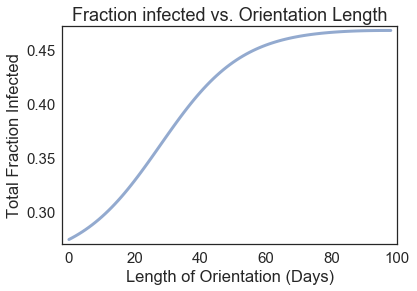

In [53]:
plot(start_semester_sweep)

decorate(xlabel='Length of Orientation (Days)',
         ylabel='Total Fraction Infected',
         title='Fraction infected vs. Orientation Length',
         legend=False)

## HELLO LIBBY AND MAYA, ITS EVEN MORE DIFFERENT NOW